In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
data = pd.read_json('../meta.jsonl.gz', lines=True)
data

,Size,BlackRank,WhiteRank,BlackPlayer,WhitePlayer,Year,Length,Source,Winner,Score,End,Handicap,Time,Komi
0,"[19, 19]",6p,7p,Honinbo Dochi,Yasui Senkaku,1706.0,221,baduk-movies,NaN,NaN,NaN,NaN,NaN,NaN
1,"[19, 19]",8p,7p,Hayashi Bokunyu,Yasui Senkaku,1714.0,213,baduk-movies,B,3.0,Scored,NaN,NaN,NaN
2,"[19, 19]",6p,7p,Honinbo Dochi,Yasui Senkaku,1710.0,247,baduk-movies,B,5.0,Scored,NaN,NaN,NaN
3,"[19, 19]",4d,2d,Kadono Matsunosuke,Nagasaka Inosuke,1807.0,192,baduk-movies,W,4.0,Scored,NaN,NaN,NaN
4,"[19, 19]",1p,1p,本因坊丈和,片山知的,1813.0,256,baduk-movies,W,9.0,Scored,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316863,"[19, 19]",9d,9d,다시(P),三齐王(P),2016.0,96,yenw-tygem,W,NaN,Time,NaN,NaN,6.5
316864,"[19, 19]",9d,9d,Dreamtale,快活三,2016.0,314,yenw-tygem,W,1.5,Scored,NaN,1200.0,6.5
316865,"[19, 19]",9d,9d,军事武器,不能忍(P),2016.0,134,yenw-tygem,W,NaN,Resign,NaN,NaN,6.5
316866,"[19, 19]",9d,9d,妙应无穷,leesp7057,2016.0,232,yenw-tygem,W,NaN,Resign,NaN,NaN,6.5


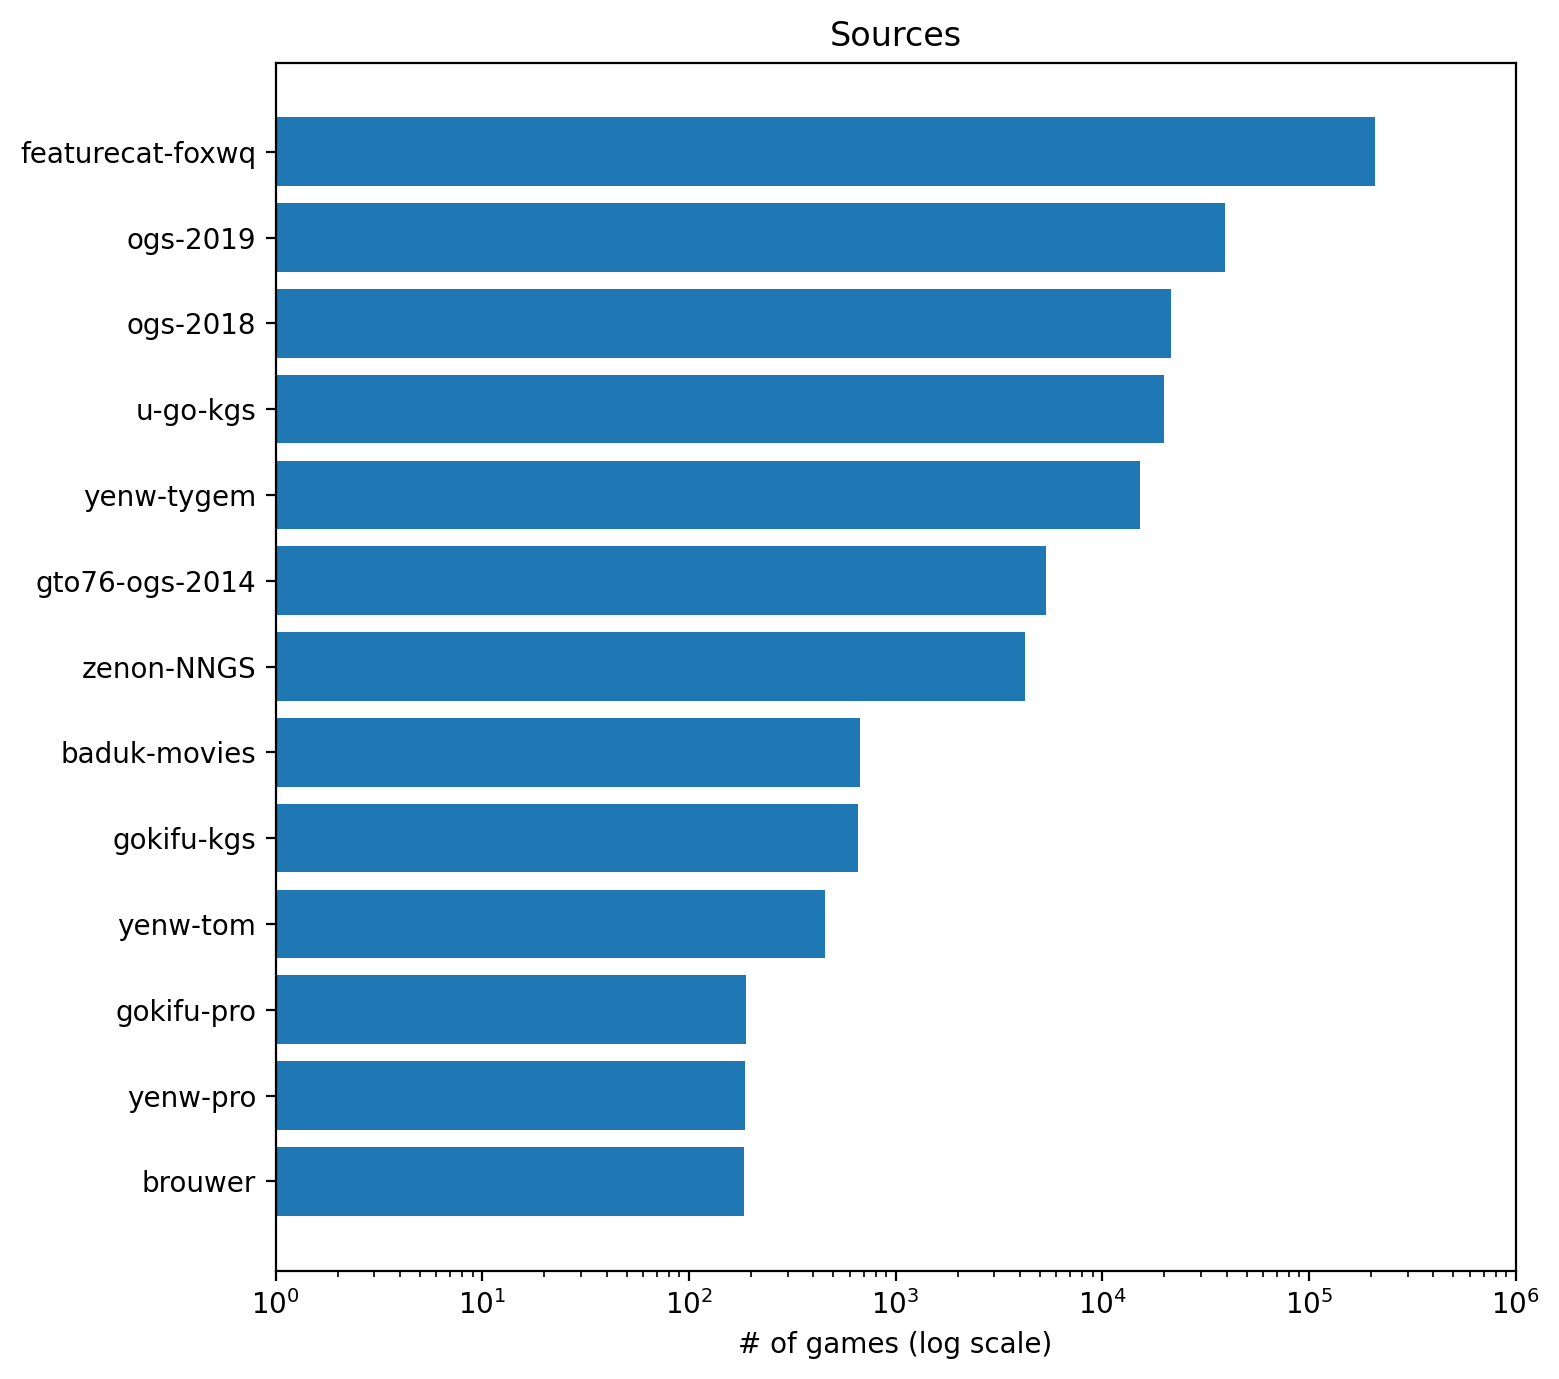

In [26]:
# Plot source counts
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
counts = data['Source'].value_counts()[::-1]
ax.barh(counts.index, counts.values)
ax.set(
    title='Sources',
    xscale='log',
    xlabel='# of games (log scale)',
    xlim=(1,1e6),
)
plt.show()

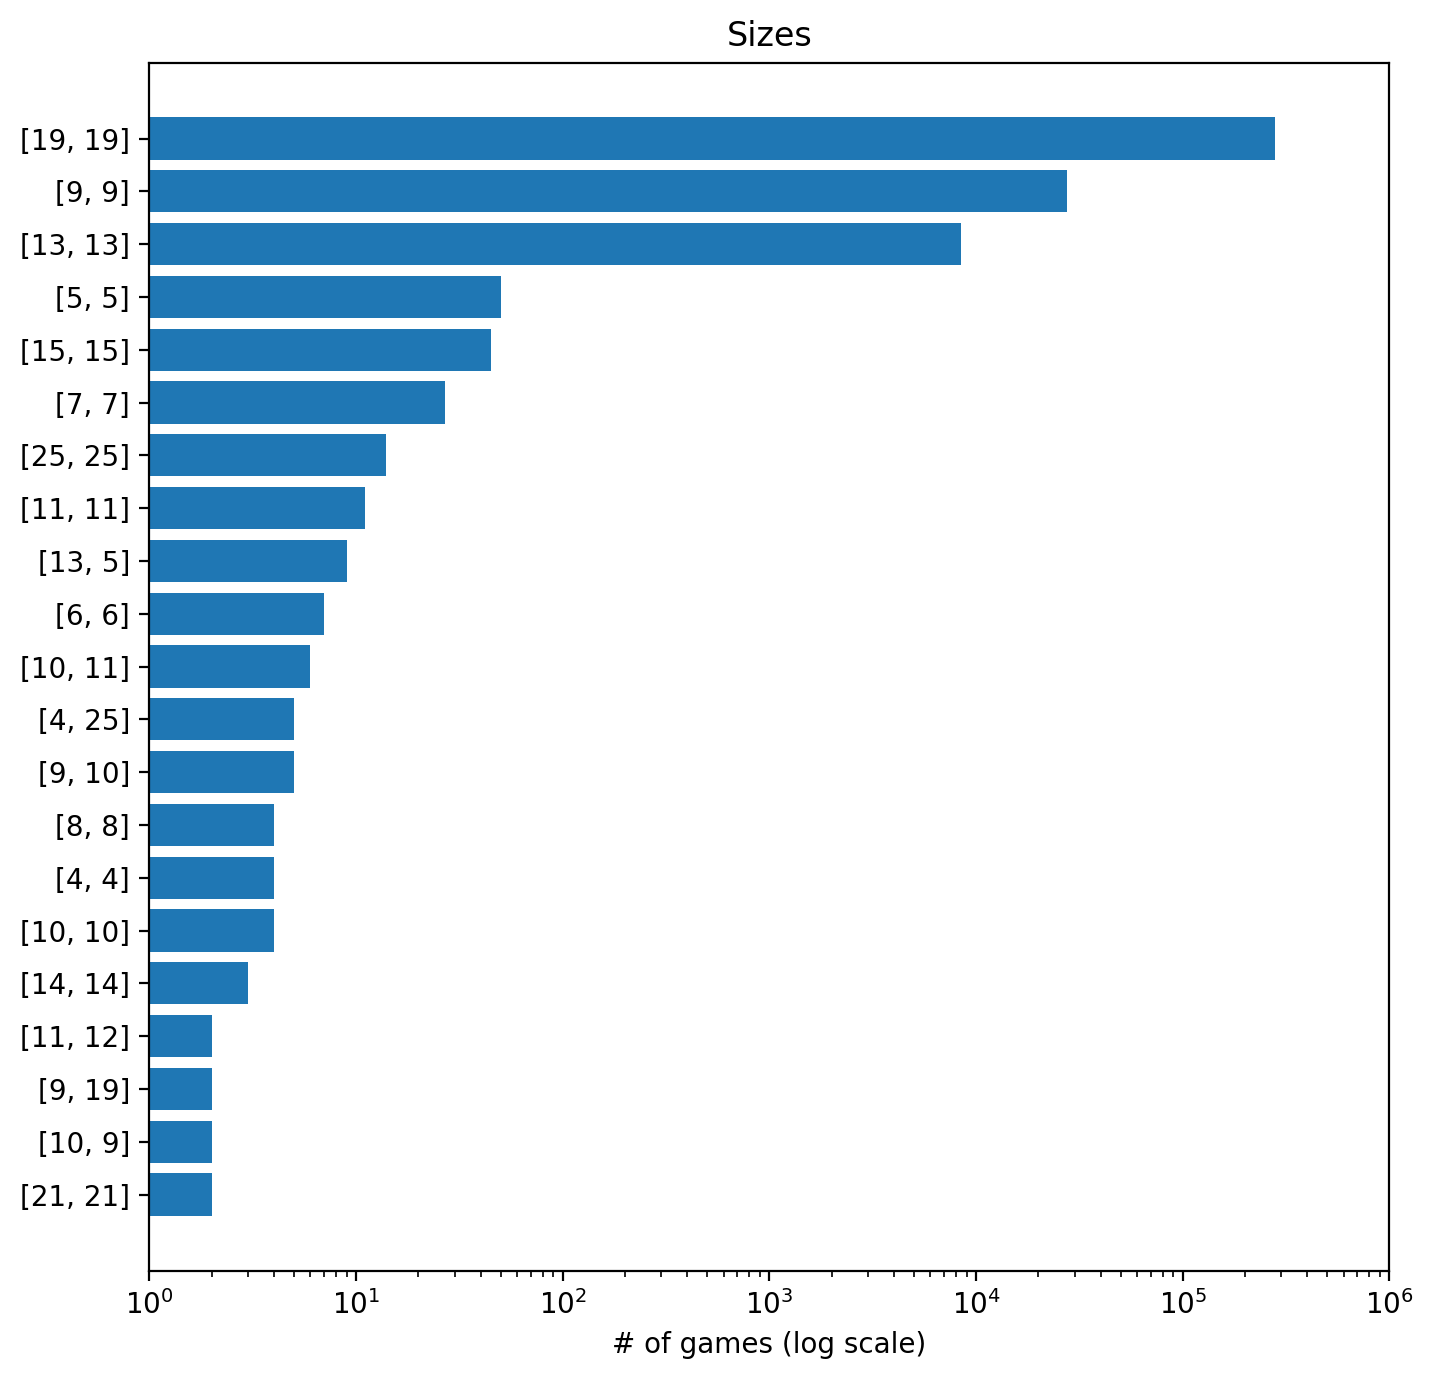

In [34]:
# Plot size counts
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
counts = data['Size'].astype(str).value_counts()[::-1]
counts = counts[counts>1]
ax.barh(counts.index, counts.values)
ax.set(
    title='Sizes',
    xscale='log',
    xlabel='# of games (log scale)',
    xlim=(1,1e6),
)
plt.show()

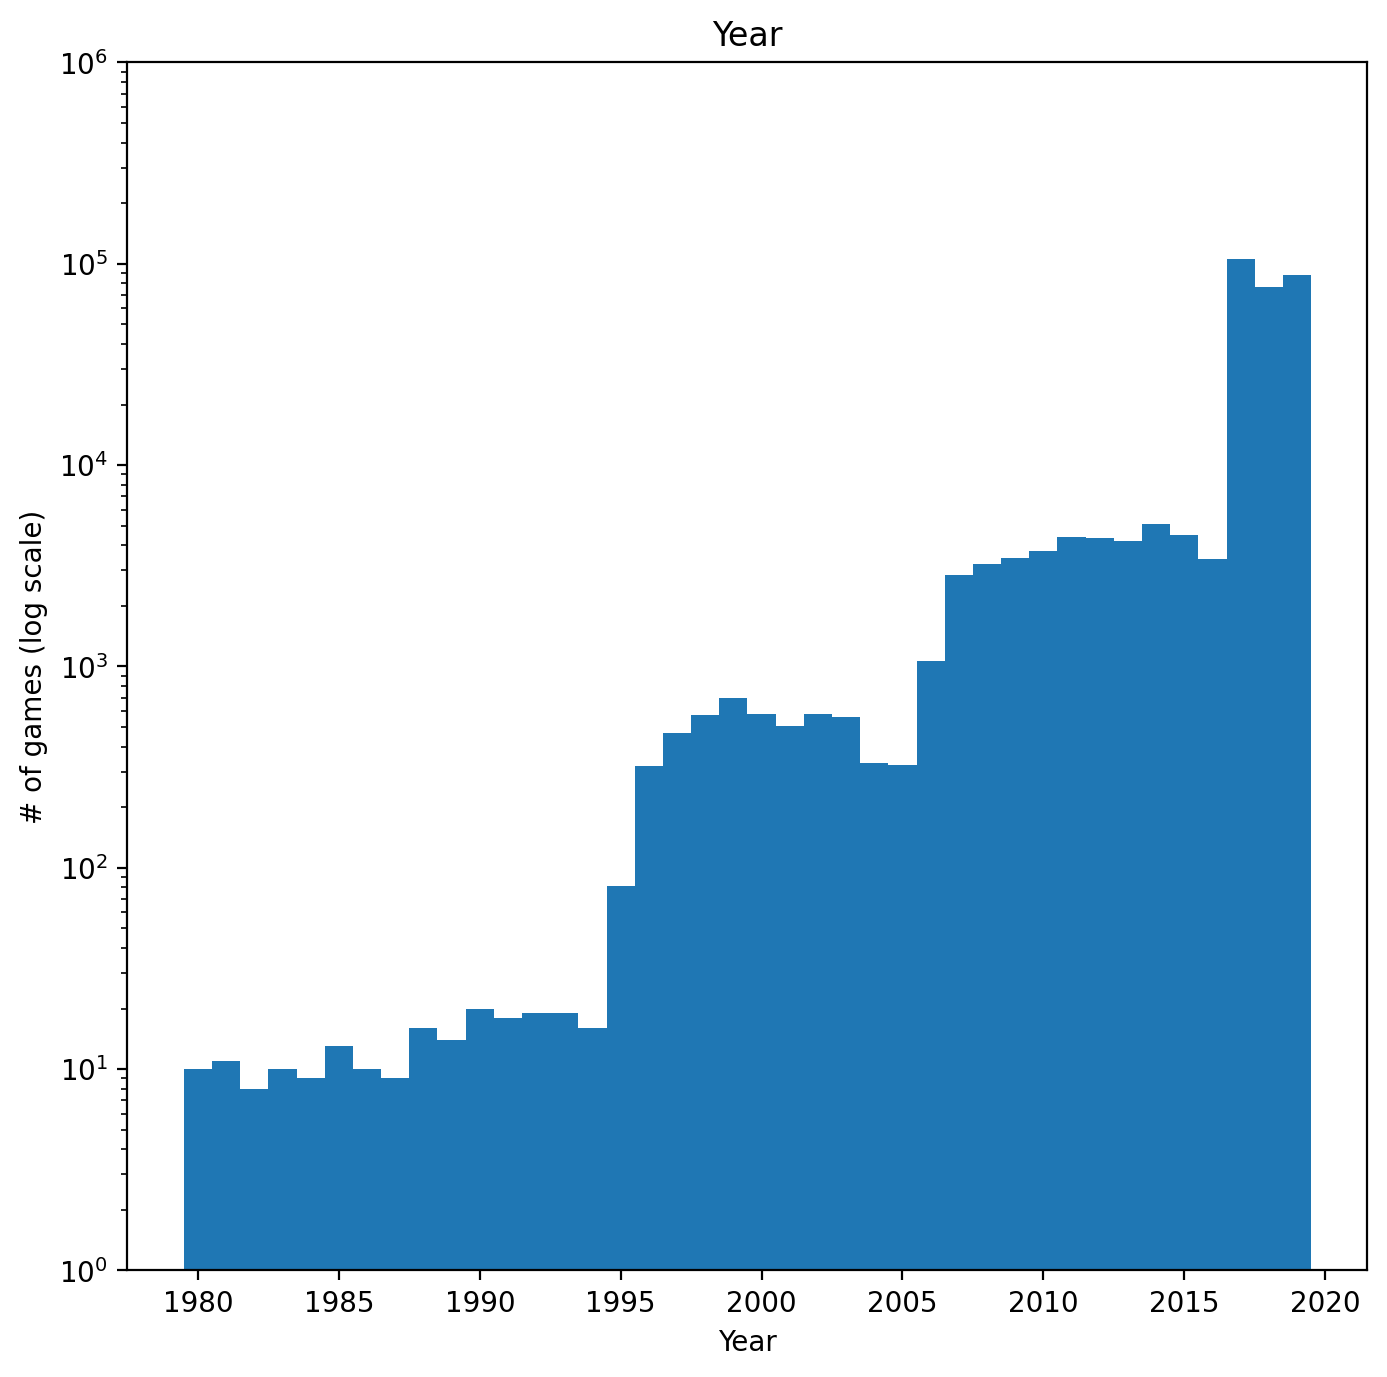

In [74]:
# Plot years
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
ax.hist(data['Year'], bins=range(1980,2021), align='left')
    
ax.set(
    title='Year',
    xlabel='Year',
    yscale='log',
    ylabel='# of games (log scale)',
    ylim=(1,1e6),
    xticks=list(range(1980,2021,5)),
)
plt.show()

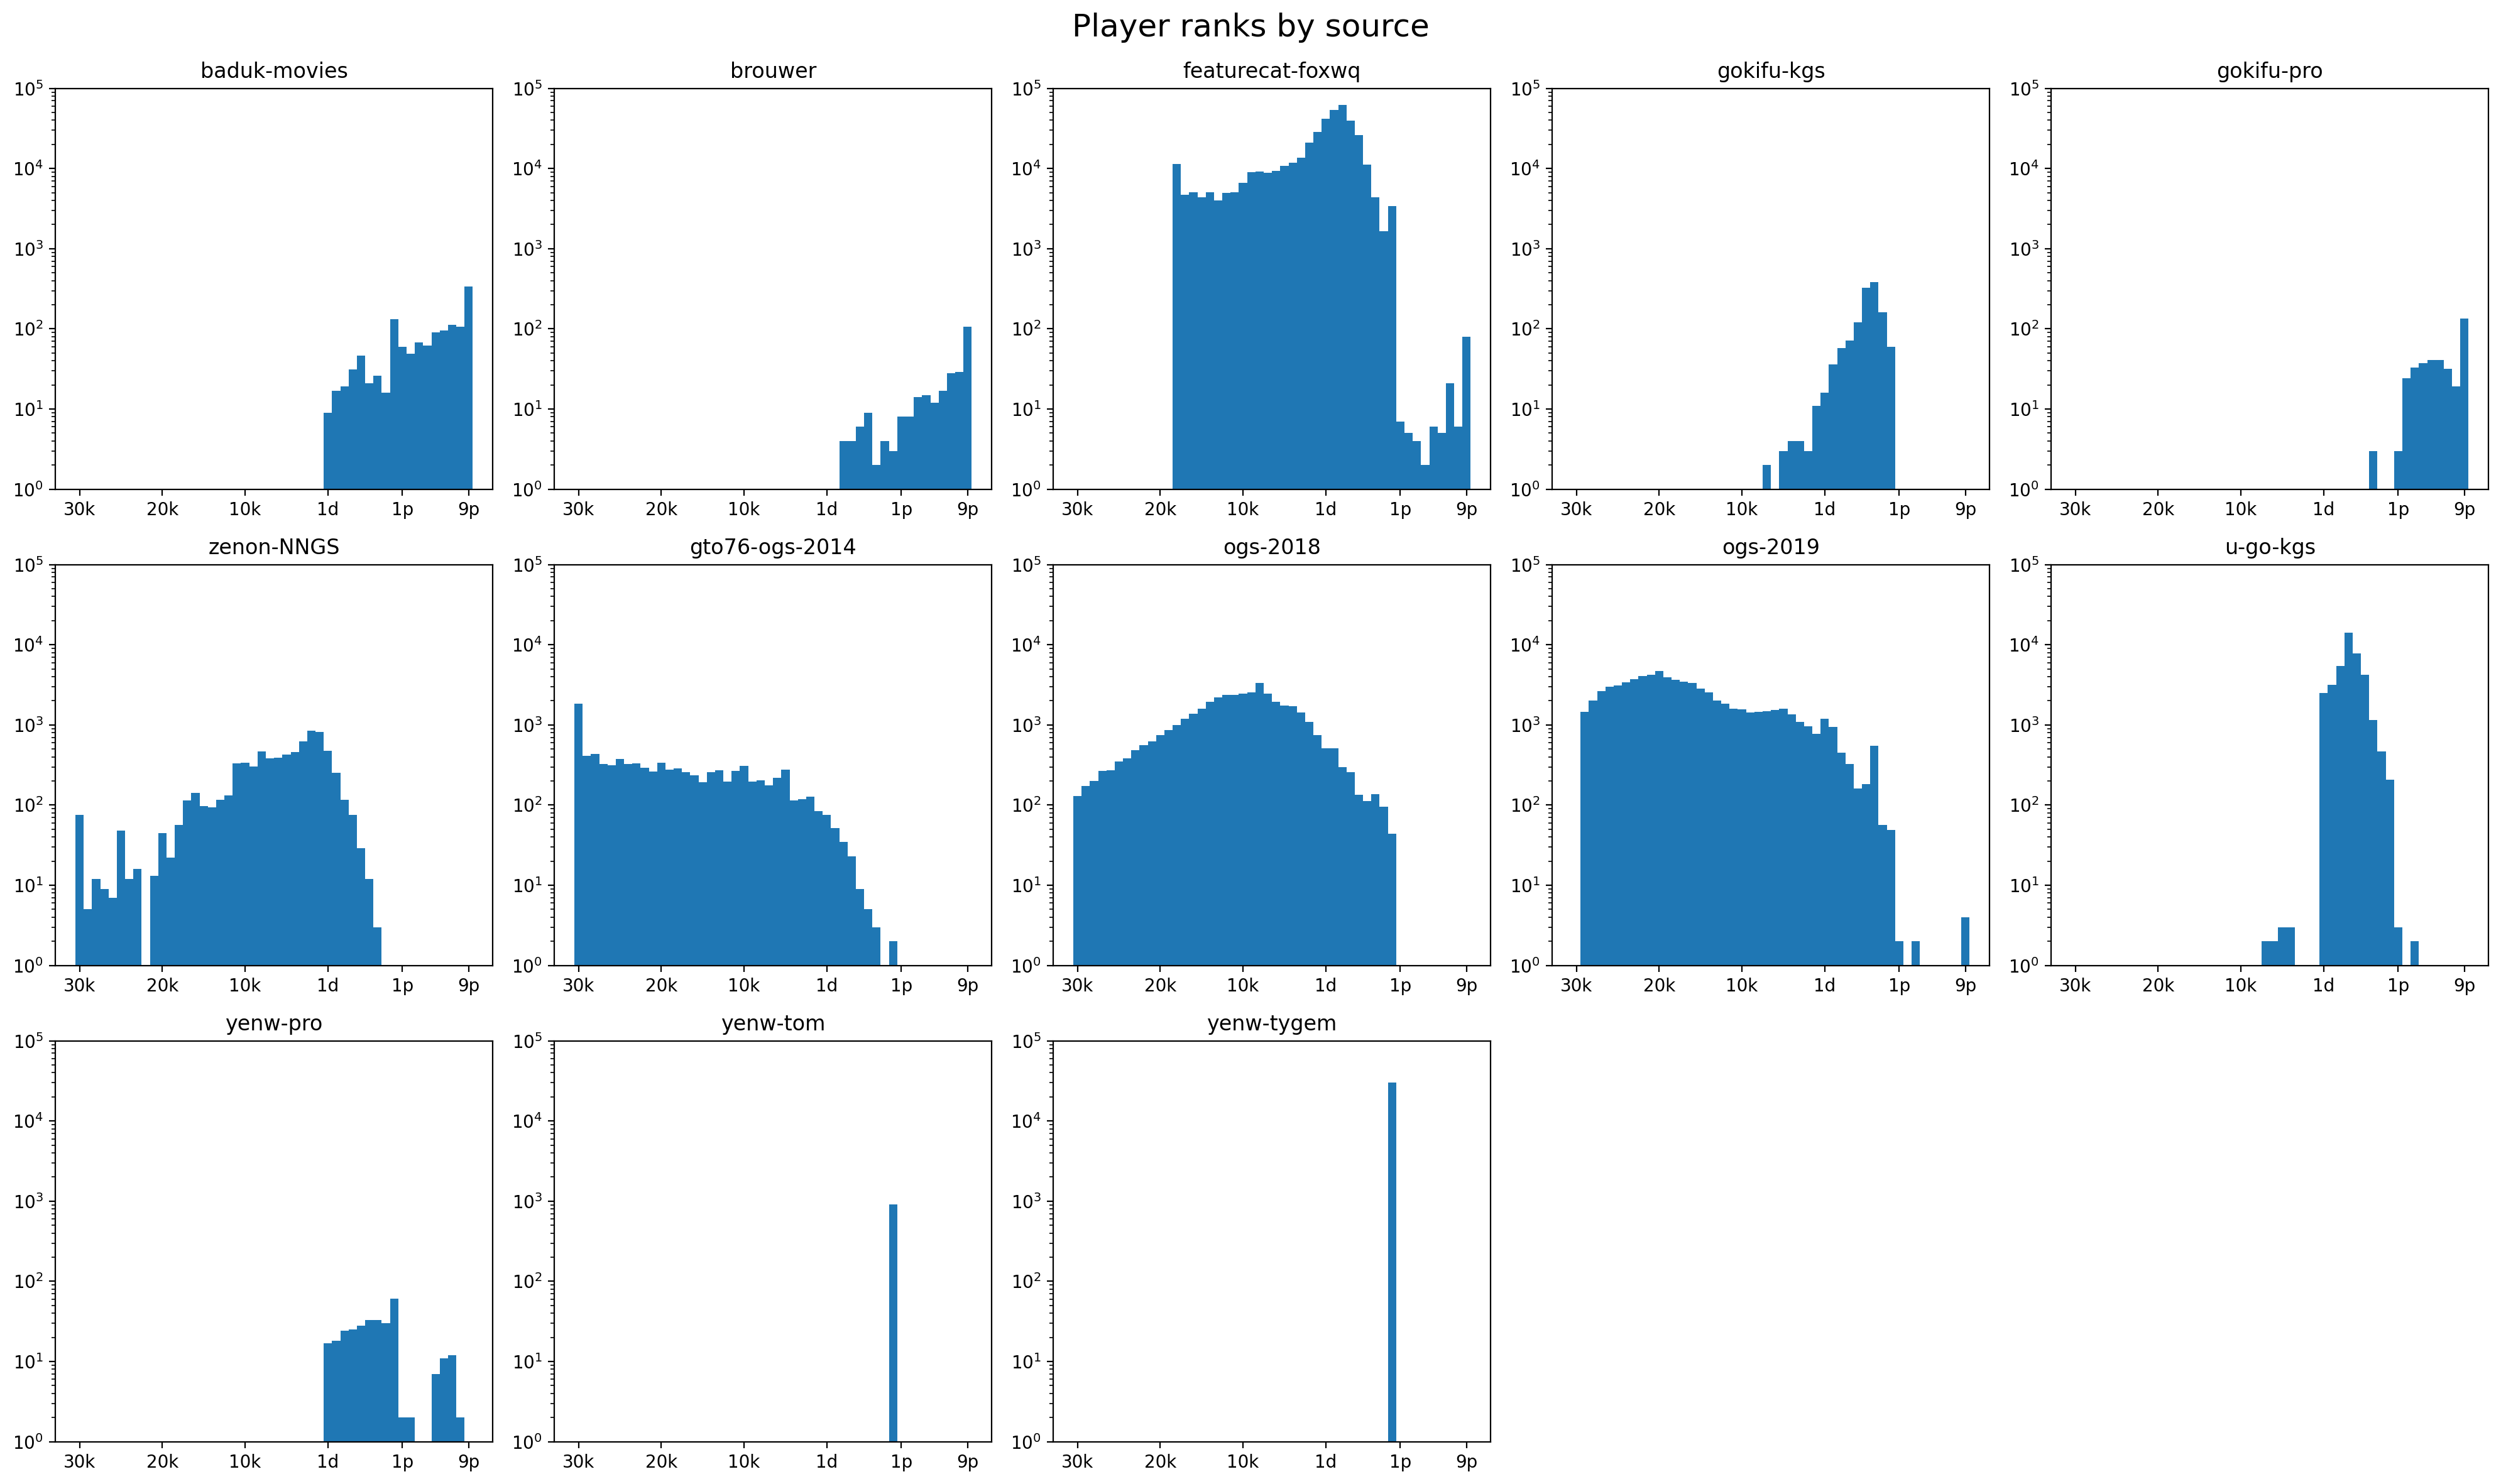

In [7]:
# Plot rank histograms for each source
sources = data['Source'].unique()
nrows=3; ncols=(len(sources)+2)//3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), dpi=200)
axes = [x for ax in axes for x in ax]

labels = [str(i)+'k' for i in range(30,0,-1)] + [str(i)+x for x in ['d','p'] for i in range(1,10)]

for i, ax in enumerate(axes):
    if i >= len(sources):
        axes[i].axis('off')
        continue
    d = data[data['Source']==sources[i]]
    rank_counts = pd.concat([d['BlackRank'], d['WhiteRank']]).value_counts()
    label_counts = pd.Series([rank_counts[l] if l in rank_counts else 0 for l in labels])
    axes[i].bar(labels, label_counts, width=1)
    axes[i].set(title=sources[i], ylim=(1,1e5), yscale='log', xticks=[0,10,20,30,39,47], yticks=[])

fig.suptitle('Player ranks by source', fontsize=18)
fig.tight_layout(rect=[0,0,1,0.96])
plt.show()

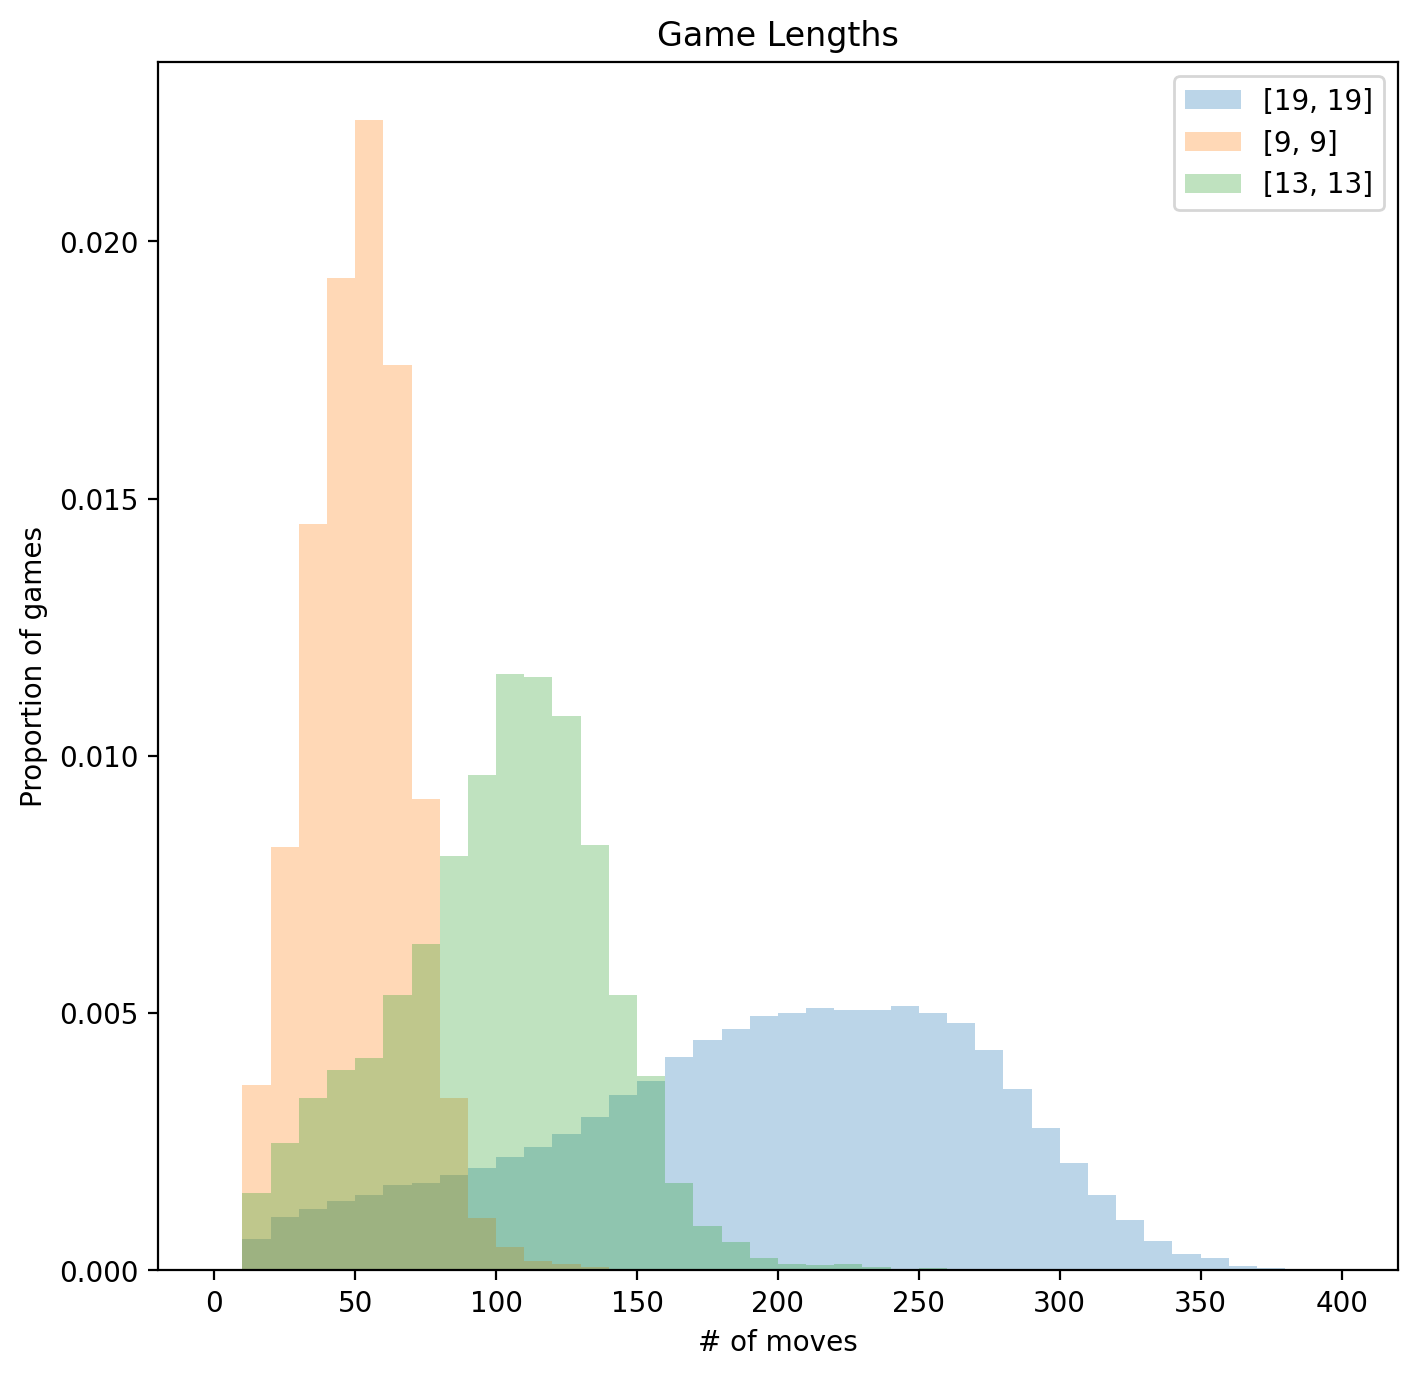

In [85]:
# Plot game length by board size
fig, ax = plt.subplots(figsize=(8,8), dpi=200)
for size in ['[19, 19]', '[9, 9]', '[13, 13]']:
    d = data[data['Size'].astype(str) == size]
    ax.hist(d['Length'], range=[0,400], bins=40, density=True, alpha=0.3, label=size)
ax.set(
    title='Game Lengths',
    xlabel='# of moves',
    ylabel='Proportion of games'
)
ax.legend()
plt.show()